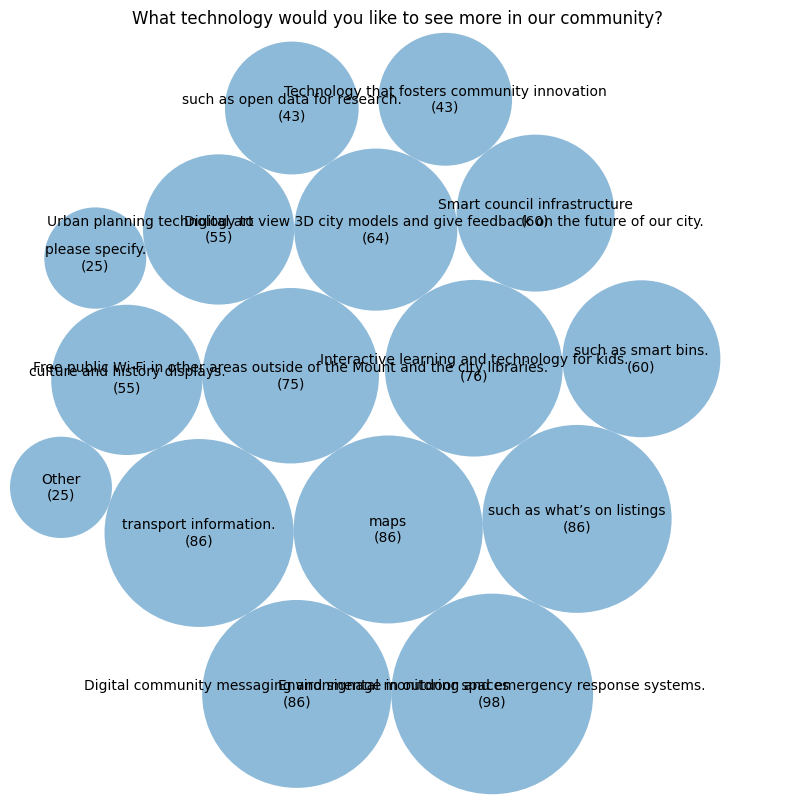

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify

# Read the CSV file
df = pd.read_csv('data/dashboard-export-11-57-pm-2024-11-21.csv')  # Replace with the actual path to survey CSV file export

# Extract the relevant column
column_name = 'Q4 - What technology would you like to see more of in our community? *\n\nPlease t...'
technologies = df[column_name]

# Split the column into individual entries (if it's a comma-separated string)
technologies_split = technologies.str.split(',').explode().str.strip()

# Count the occurrences of each unique entry
technology_counts = technologies_split.value_counts()

# print(technology_counts)

# Compute circle positions
circles = circlify.circlify(
    technology_counts.tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Reverse the order of the circles to match the order of data
circles = circles[::-1]

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('What technology would you like to see more in our community?')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# List of labels (should correspond to unique values, not the original `df` column)
labels = technology_counts.index

# Print circles with labels
for circle, label, count in zip(circles, labels, technology_counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2))
    plt.annotate(
        f"{label}\n({count})",  # Add count to label
        (x, y),
        va='center',
        ha='center'
    )